# Analyse et mise en forme de notre jeu de donnée

# Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import os
import pickle
from time import time
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Analyse du Data_set

Chemin de données

In [2]:
# Dossier principal du dataset
path_datasrc = Path('/home/morlot/code/Anaconda/OpenClassroom/Projet 9 Réalisez une application de recommandation de contenu/news-portal-user-interactions-by-globocom')

# Dossier clicks files
click_path = Path('/home/morlot/code/Anaconda/OpenClassroom/Projet 9 Réalisez une application de recommandation de contenu/news-portal-user-interactions-by-globocom/clicks')

# Dossier clicks

#### On liste tous les fichiers clicks et on extrait les données dans un dataframe

In [3]:
file_click = sorted(os.listdir(click_path))
click_list = []

# On va chercher tout les fichiers dans le dossier click
for i in range(0, len(file_click)):
    temp = pd.read_csv(click_path / file_click[i])
    temp['filename'] = i
    click_list.append(temp)

clicks = pd.concat(click_list, axis=0, ignore_index=True)

clicks.rename(columns={'click_article_id':'article_id'}, inplace=True)

# Convertion en datetime
date2convert = ['session_start', 'click_timestamp']
for col in date2convert:
    clicks[col] = pd.to_datetime(clicks[col], unit='ms')

print('Données de clics: ', clicks.shape)
clicks.head()

Données de clics:  (2988181, 13)


,user_id,session_id,session_start,session_size,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,filename
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2,0
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2,0
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2,0
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2,0
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2,0


In [4]:
clicks.isna().sum()

user_id                0
session_id             0
session_start          0
session_size           0
article_id             0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
filename               0
dtype: int64

Il n'y a pas de donnée manquante

## valeur unique

In [5]:
print('=== Valeur unique ===')
print('=================================================================')
for col in clicks.columns:
    print(col, ' :', clicks[col].nunique())

=== Valeur unique ===
user_id  : 322897
session_id  : 1048594
session_start  : 646874
session_size  : 72
article_id  : 46033
click_timestamp  : 2983198
click_environment  : 3
click_deviceGroup  : 5
click_os  : 8
click_country  : 11
click_region  : 28
click_referrer_type  : 7
filename  : 384


# Dataset articles_metadata.csv

In [6]:
articles = pd.read_csv(path_datasrc / 'articles_metadata.csv')

# Convert date string to datetime type
articles['created_at_ts'] = pd.to_datetime(
    (pd.to_datetime(
        articles['created_at_ts'],
        unit='ms')).dt.strftime('%Y/%m/%d'))
print('Min/Max creation date:', articles['created_at_ts'].min(),
      '/ ', articles['created_at_ts'].max())

# Display shape and 5 first rows
print('Métadonnées des articles: ', articles.shape)
articles.head()

Min/Max creation date: 2006-09-27 00:00:00 /  2018-03-13 00:00:00
Métadonnées des articles:  (364047, 5)


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13,0,168
1,1,1,2014-07-14,0,189
2,2,1,2014-08-22,0,250
3,3,1,2014-08-19,0,230
4,4,1,2014-08-03,0,162


* **article_id**: article id;
* **category_id**: id de la category de l'article;
* **created_at_ts**: date de publication;
* **publisher_id**: id de publication;
* **word_count**: nombre de mot par article.

## Valeur unique

In [7]:
print('=== Valeur unique ===')
print('=============================================================')
for col in articles.columns:
    print(col, ' :', articles[col].nunique())

=== Valeur unique ===
article_id  : 364047
category_id  : 461
created_at_ts  : 2302
publisher_id  : 1
words_count  : 866


# Dossier embeddings pickle

In [8]:
with open(os.path.join(path_datasrc,'articles_embeddings.pickle'), 'rb') as file:
    embeddings = pickle.load(file)

# Save dataframe
df_embeddings = pd.DataFrame(embeddings)
df_embeddings = df_embeddings.add_prefix('dim_')

print('Articles embeddings shape: ', df_embeddings.shape)
df_embeddings.head()

Articles embeddings shape:  (364047, 250)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_240,dim_241,dim_242,dim_243,dim_244,dim_245,dim_246,dim_247,dim_248,dim_249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


**Key observations:**
* 322,897 unique utilisateur;
* 364,047 articles disponible dans la database;

# Information sur les datasets

## Analyse des periodes

In [9]:
print('Sessions start from {} to {}'.format(clicks.session_start.min(), clicks.session_start.max()))

Sessions start from 2017-10-01 02:37:03 to 2017-10-17 03:36:19


In [10]:
print('Clicks period starts from {} to {}'.format(clicks.click_timestamp.min(), clicks.click_timestamp.max()))


Clicks period starts from 2017-10-01 03:00:00.026000 to 2017-11-13 20:04:14.886000


## Profile utilisateur

Pour identifier les articles susceptibles d'intéresser l'utilisateur, il faut analyser les données le concernant pour construire explicitement ou implicitement des connaissances afin d'établir son profil - profil qui sera ensuite utilisé par le système de recommandation.

Les données sont dites :

* explicite, lorsque l'utilisateur participe à la construction des données, par exemple, lorsqu'il donne une note à un article, met un "j'aime" sur un article, etc. ;
* implicite, lorsque les données capturées concernent les interactions de l'utilisateur avec le système, telles que l'historique de navigation ou de recherche, les clics sur les articles, les téléchargements, la durée de consultation, la plateforme utilisée, etc.

Dans cette partie, nous allons essayer de trouver des données exploitables sur les utilisateurs.

### 5.3.1 Sessions

# session per user, Mean: 3.2 - Min: 1, Max: 207.


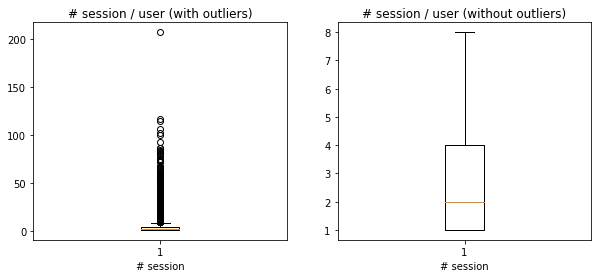

In [11]:
x = clicks.groupby(['user_id'])['session_id'].nunique()
print(
    '# session per user, Mean: {} - Min: {}, Max: {}.'.format(round(x.mean(), 1),
                                                              x.min(),
                                                              x.max()))

fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(10, 4))
ax1.boxplot(x)
ax1.set_xlabel('# session')
ax1.set_title('# session / user (with outliers)')
ax2.boxplot(x, showfliers=False)
ax2.set_xlabel('# session')
ax2.set_title('# session / user (without outliers)')
plt.show()

<AxesSubplot:title={'center':'Sessions distribution'}, xlabel='session_size'>

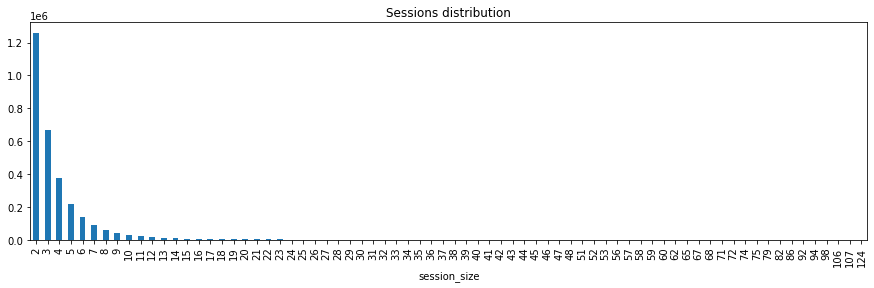

In [12]:
clicks.groupby('session_size').size().plot(kind='bar', figsize=(15, 4),
                                           title='Sessions distribution')

**Observations clés**
* Les utilisateurs ont eu en moyenne 3 sessions sur la période d'analyse, avec un minimum de 1 et un maximum de 207.
* Les utilisateurs consultent généralement 2 articles par session, avec un maximum de 124 ;

### Localisation

<AxesSubplot:title={'center':'# user per state'}, xlabel='click_country'>

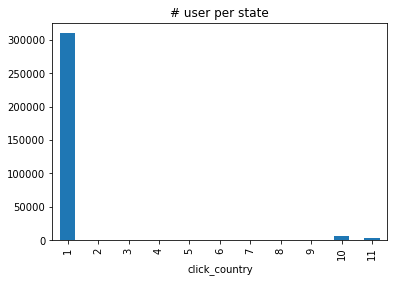

In [13]:
clicks.groupby('click_country')['user_id'].nunique().plot(kind='bar', title='# user per state')

<AxesSubplot:title={'center':'# user per state and region'}, xlabel='click_country,click_region'>

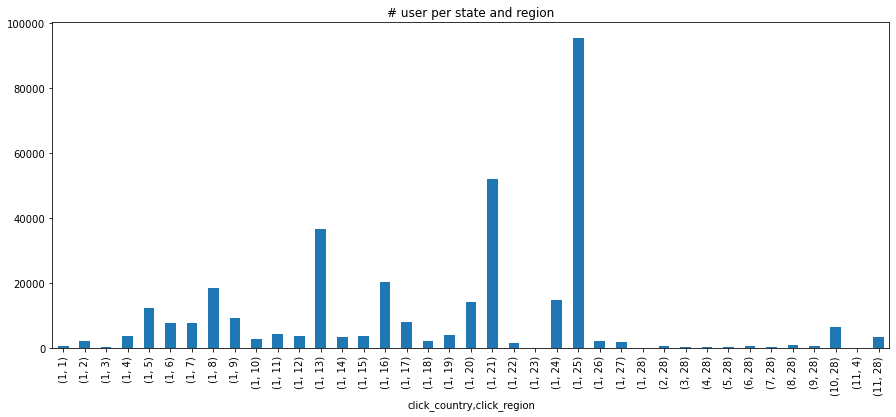

In [14]:
clicks.groupby(['click_country', 'click_region'])['user_id'].nunique().plot(kind='bar', figsize=(15, 6), title='# user per state and region')


**Key observations**
La majorité des utilisateurs sont localisés dans l'état n°1 ;
Dans l'état n°1, les 3 régions les plus actives par ordre d'importance sont 25, 21 et 13.

### 5.3.3 Periode de lecture

<AxesSubplot:title={'center':'# articles par jour'}, xlabel='session_start'>

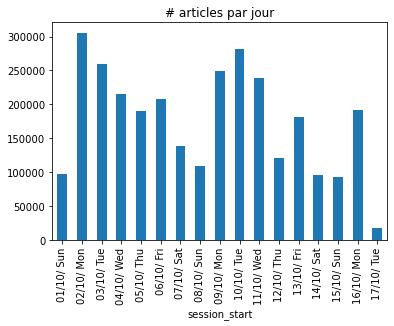

In [15]:
clicks.groupby(clicks['session_start'].dt.strftime('%d/%m/ %a')).size().plot(kind='bar', title='# articles par jour')

**Observations clés**

Les utilisateurs consultent davantage les articles en début de semaine que le week-end.

### 5.3.4 Context of the articles readings

* **click_environment**:  (1-Facebook, 2-Mobile App 3-Mobile Pages 4-Web);
* **click_deviceGroup**:  (1-tablet, 2-TV, 4-Mobile, 5-Computer, or 3-blank);
* **click_os**:  (1-Other, 2-iOS, 3-Android, 4-Windows Phone, 5-Windows Mobile, 6-Windows, 7-Mac OS X, 8-Mac OS, 9- Samsung, 10-FireHbbTV, 11-ATV OS X, 12-tvOS, 13-Chrome OS, 14-Debian, 15-Symbian OS, 16-BlackBerry OS, 17-Firefox OS, 18-Android, 19-Brew MP, 20 -Chromecast, 21-webOS, 22-Gentoo, 23-Solaris);

<function matplotlib.pyplot.show(close=None, block=None)>

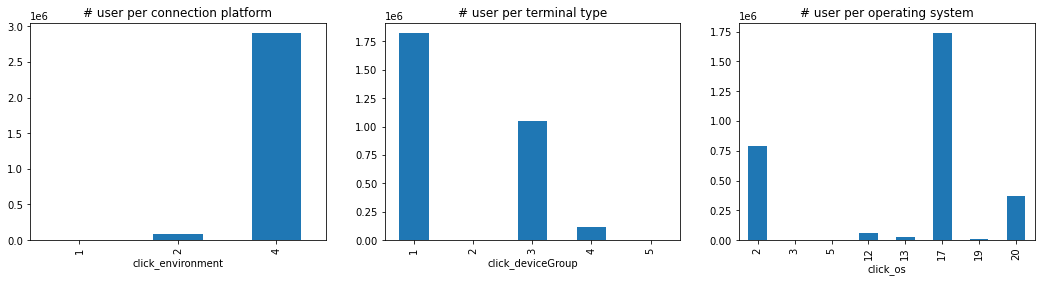

In [16]:
a = clicks.groupby('click_environment')['user_id'].count()
b = clicks.groupby('click_deviceGroup')['user_id'].count()
c = clicks.groupby('click_os')['user_id'].count()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
a.plot(kind='bar', title='# user per connection platform', ax=ax1)
b.plot(kind='bar', title='# user per terminal type', ax=ax2)
c.plot(kind='bar', title='# user per operating system', ax=ax3)
plt.show

**Observations clés**

* La lecture des articles se fait sur la page web Globo.com (peu de consultation sur l'application mobile) ;
* Les utilisateurs consultent principalement les articles sur tablettes ;
* Le principal système d'exploitation est Firefox.

NOTE : ces données apporteraient un biais à notre projet car notre MVP (minimum viable product) est une application mobile : elles ne seront donc pas prises en compte dans notre système de recommandation.

### 5.3.5 Articles categories

In [17]:
# Merge DF
clicks_articles = pd.merge(clicks, articles, how='inner', on='article_id')

# Convert timestamp to datetime
clicks_articles['session_start'] = pd.to_datetime(clicks_articles['session_start'].dt.strftime('%Y/%m/%d'))
clicks_articles['click_timestamp'] = pd.to_datetime(clicks_articles['click_timestamp'].dt.strftime('%Y/%m/%d'))

# Display shape and 5 first rows
print(clicks_articles.shape)
clicks_articles.head()

(2988181, 17)


,user_id,session_id,session_start,session_size,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,filename,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,2017-10-01,2,157541,2017-10-01,4,3,20,1,20,2,0,281,2017-09-30,0,280
1,20,1506825727279757,2017-10-01,2,157541,2017-10-01,4,1,17,1,9,1,0,281,2017-09-30,0,280
2,44,1506826139185781,2017-10-01,5,157541,2017-10-01,4,1,17,1,12,1,0,281,2017-09-30,0,280
3,45,1506826142324782,2017-10-01,2,157541,2017-10-01,4,1,17,1,17,1,0,281,2017-09-30,0,280
4,76,1506826463226813,2017-10-01,2,157541,2017-10-01,4,3,2,1,21,1,0,281,2017-09-30,0,280


<function matplotlib.pyplot.show(close=None, block=None)>

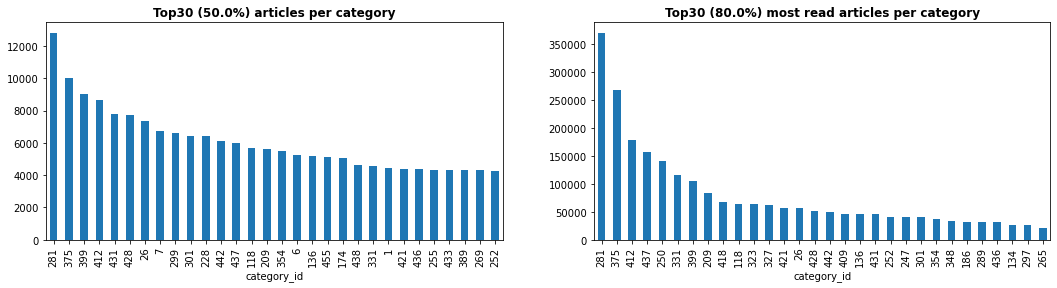

In [18]:
# Plot nb articles per categorie
d = articles.groupby('category_id')['article_id'].nunique().sort_values(ascending=False)
e = clicks_articles.groupby('category_id')['article_id'].count().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
d.head(30).plot(kind='bar', ax=ax1)
ax1.set_title('Top30 ({}%) articles per category'.format(
    round(sum(d.head(30))/sum(d) * 100, 0)),
    fontsize=12, fontweight='bold')
e.head(30).plot(kind='bar', ax=ax2)
ax2.set_title('Top30 ({}%) most read articles per category'.format(
    round(sum(e.head(30))/sum(e) * 100, 0)),
    fontsize=12, fontweight='bold')
plt.show

In [19]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

print(intersection(d.head(30).index.to_list(), e.head(30).index.to_list()))

[281, 375, 399, 412, 431, 428, 26, 301, 442, 437, 118, 209, 354, 136, 331, 421, 436, 252]


**Observations clés**

* 50% des articles publiés appartiennent aux 30 premières catégories (461 au total) ;
* Les catégories 281, 375 et 412 concentrent à la fois un grand nombre d'articles publiés (31 340 ; 68 % des articles) et un grand nombre d'articles consultés (817 994, 27 % des interactions) : probablement des sujets d'actualité (politique, économie, etc.) .

REMARQUE : L'utilisation de la catégorie peut limiter nos recommandations aux articles populaires.

### Mot par article

# word per article, Mean: 191.0 - Min: 0, Max: 6690.
Half of articles have between159.0 and 218.0 words


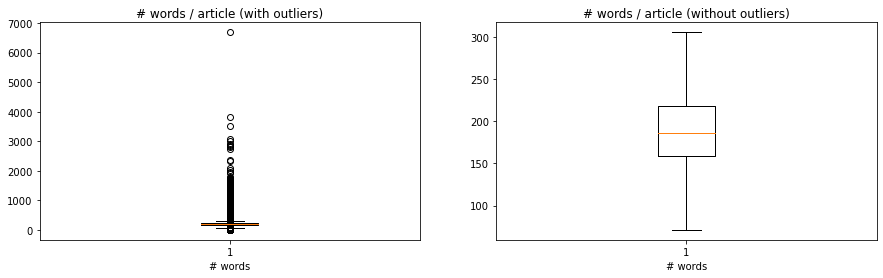

In [20]:
x = articles['words_count']
print(
    '# word per article, Mean: {} - Min: {}, Max: {}.'.format(round(x.mean(), 0),
                                                              x.min(),
                                                              x.max()))
print('Half of articles have between{} and {} words'.format(x.quantile(.25),
                                                                      x.quantile(.75)))

# Plot boxplot
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(15, 4))
ax1.boxplot(x)
ax1.set_xlabel('# words')
ax1.set_title('# words / article (with outliers)')
ax2.boxplot(x, showfliers=False)
ax2.set_xlabel('# words')
ax2.set_title('# words / article (without outliers)')
plt.show()


In [21]:
# Focus on articles without words_count
print('Number of articles involved: ', len(articles[articles['words_count'] == 0]))
articles[articles['words_count'] == 0]

Number of articles involved:  35


,article_id,category_id,created_at_ts,publisher_id,words_count
35491,35491,43,2016-08-04,0,0
38472,38472,51,2011-04-21,0,0
39043,39043,64,2014-06-30,0,0
39054,39054,64,2015-01-21,0,0
164414,164414,288,2015-03-30,0,0
206233,206233,331,2017-09-30,0,0
212323,212323,343,2010-04-19,0,0
212324,212324,343,2010-04-16,0,0
212327,212327,343,2014-08-11,0,0
212526,212526,347,2018-01-28,0,0


**Observations clés**

* Les articles ont en moyenne ~200 mots ;
* Nous avons quelques légères incohérences avec les articles sans paroles, principalement dans la catégorie 431.

### Chronologie des lectures

In [22]:
# Calculate view recency
clicks_articles['view_recency'] = clicks_articles['click_timestamp'] - clicks_articles['created_at_ts']
clicks_articles['view_recency'] = (clicks_articles['view_recency'] / pd.Timedelta(days=1))

# Filter article by popularity
articles_popularity = clicks_articles.groupby('article_id', as_index=False)['click_timestamp'].count()
articles_popularity.rename(columns={'click_timestamp':'nbClicks'}, inplace=True)
articles_popularity.sort_values(by=['nbClicks'], ascending=False, inplace=True)

# Keep only the top 10 articles for analysis
articles_top10 = articles_popularity.head(10)

# Merge the top10 with 1st DF to track creation and start session date
articles_top10 = pd.merge(articles_top10, clicks_articles, on='article_id')

# Ensure there is no inconsistent data
articles_top10 = articles_top10[articles_top10.view_recency >= 0]
print('Top10 articles interactions shape: ', articles_top10.shape)

# Create DF with only the top10 articles
top10_clicks_per_day = pd.DataFrame(
    articles_top10.groupby(['article_id','view_recency'], as_index=False)['click_timestamp'].count())

# Display shape and 5 first rows
print('Top10 articles views shape: ', top10_clicks_per_day.shape)
top10_clicks_per_day.head()

Top10 articles interactions shape:  (240861, 19)
Top10 articles views shape:  (94, 3)


,article_id,view_recency,click_timestamp
0,96210,0.0,1252
1,96210,1.0,17613
2,96210,2.0,2663
3,96210,3.0,34
4,96210,4.0,12


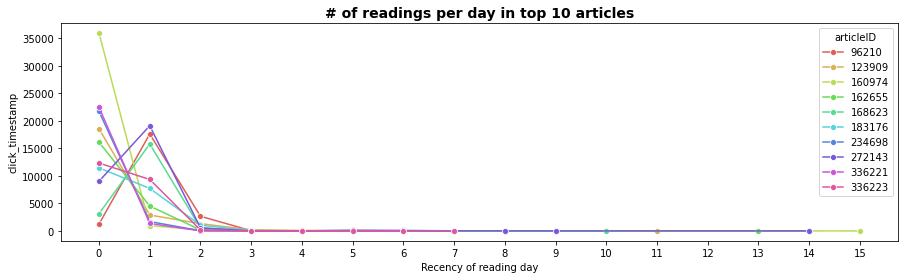

In [23]:
# Plot articles view per 1st day to 15th day
plt.figure(figsize=(15, 4))
palette = sns.color_palette('hls', 10)
sns.lineplot(x=top10_clicks_per_day['view_recency'],
             y=top10_clicks_per_day['click_timestamp'],
             hue=top10_clicks_per_day['article_id'],
             data=top10_clicks_per_day,
             palette=palette,
             marker='o')
plt.xticks(range(0, len(top10_clicks_per_day.view_recency.unique())+1))
plt.xlabel('Recency of reading day')
plt.legend(top10_clicks_per_day.article_id.unique(), title='articleID')
plt.title('# of readings per day in top 10 articles',
          fontsize=14, fontweight='bold')
plt.show()

**Observations clés**

Sur le top10, les articles sont consultés soit le jour même soit le lendemain, et l'intérêt décroît très vite les jours suivants.

# Conclusions

Dans ce jeu de données nous n'avons que des données implicites (pas de notation explicite) : les données sont binaires (article lu/non lu par l'utilisateur, sans scores ni notations).

* **Avantage** : ils sont faciles à récupérer ;
* **Inconvénient** : ils ne donnent aucune indication que l'utilisateur n'aime pas un article ou que l'article consulté le concerne ou concerne un tiers.
* **Nous n'avons pas pu créer de données actionnables supplémentaires** comme la durée de consultation (cela aurait peut-être permis de créer artificiellement une note sur l'intérêt porté à l'article)

# Création de modèles 

L'objectif général d'une méthode de recommandation est de *prédire les valeurs manquantes* d'une matrice utilisateur-élément, où chaque utilisateur est associé à une ligne et chaque élément à une colonne.

Ce cahier a pour objectif de présenter les étapes de conception de 3 modèles de recommandation :

* Un modèle non personnalisé basé sur la popularité de l'article ;
* Un modèle basé sur le contenu ;
* Un modèle basé sur le filtrage collaboratif.

# Recommenders systems theory

There are two main types of recommender systems – personalized and non-personalized.

* **Non-personalized recommendation systems** like popularity based recommenders recommend the most popular items to the users, for instance top-10 movies, top selling books, the most frequently purchased products.
* **Personalized recommender system** analyzes users data, their purchases, rating and their relationships with other users in more detail. In that way every user will get customized recommendations.

* Les types les plus populaires de systèmes de recommandation personnalisés sont le filtrage basé sur le contenu et le filtrage collaboratif.
* Les systèmes de recommandation non personnalisés, tels que les recommandations basées sur la popularité, recommandent les articles les plus populaires aux utilisateurs, par exemple les 10 meilleurs films, les livres les plus vendus, les produits les plus fréquemment achetés.

# Préparation de données

In [24]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

def load_data(src_path, click_path):

    articles = pd.read_csv(src_path / 'articles_metadata.csv')
    articles.drop(columns=['publisher_id'], inplace=True)
    articles = articles.astype(np.int64)

    embeddings = pd.read_pickle(src_path / 'articles_embeddings.pickle')
    embeddings = embeddings.astype(np.float32)

    clicks = pd.DataFrame().append([pd.read_csv(click_path / file) for file in sorted(os.listdir(click_path))],ignore_index=True)
    clicks.rename(columns={'click_article_id':'article_id'}, inplace=True)
    clicks.drop(columns=['click_environment', 'click_deviceGroup', 'click_os', 'click_country', 'click_region', 'click_referrer_type'], inplace=True)
    clicks = clicks.astype(np.int64)

    return articles, embeddings, clicks

In [25]:
src_path = Path('/home/morlot/code/Anaconda/OpenClassroom/Projet 9 Réalisez une application de recommandation de contenu/news-portal-user-interactions-by-globocom')

click_path = Path('/home/morlot/code/Anaconda/OpenClassroom/Projet 9 Réalisez une application de recommandation de contenu/news-portal-user-interactions-by-globocom/clicks')

articles, embeddings, clicks = load_data(src_path, click_path)

print('Articles Dataframe shape: ', articles.shape)
print('Embedding Matrix shape: ', embeddings.shape)
print('Clicks Dataframe shape: ', clicks.shape)

Articles Dataframe shape:  (364047, 4)
Embedding Matrix shape:  (364047, 250)
Clicks Dataframe shape:  (2988181, 6)


## Interaction des données

In [26]:
print(clicks.shape)
# Display DF shape and 5 first rows
print('Clicks Dataframe shape: ', clicks.shape)
clicks.head()

clicks.to_csv('./clicks.csv', index=False)

(2988181, 6)
Clicks Dataframe shape:  (2988181, 6)


## Data article

In [27]:
# Display DF shape and 5 first rows
print('Articles Dataframe shape: ', articles.shape)
clicks[clicks["article_id"] == 157541]

articles.head()

Articles Dataframe shape:  (364047, 4)


,article_id,category_id,created_at_ts,words_count
0,0,0,1513144419000,168
1,1,1,1405341936000,189
2,2,1,1408667706000,250
3,3,1,1408468313000,230
4,4,1,1407071171000,162


## Embeddings data

In [28]:
df_embeddings = pd.DataFrame(embeddings)
print('Embedding Matrix shape: ', embeddings.shape)
df_embeddings.head()

Embedding Matrix shape:  (364047, 250)


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


## Valeur unique

In [29]:
print("Nombre unique d'utilisateur: ", clicks.user_id.nunique())
print("Nombre d'article unique: ", articles.article_id.nunique())
print("Nombre d'article lu par les utilisateurs: ", clicks.article_id.nunique())

Nombre unique d'utilisateur:  322897
Nombre d'article unique:  364047
Nombre d'article lu par les utilisateurs:  46033


# Modèle de recommandation de popularité

C'est un type de système de recommandation qui fonctionne sur le principe de la popularité et/ou de tout ce qui est à la mode. Ces systèmes vérifient les produits ou les films qui sont à la mode ou les plus populaires parmi les utilisateurs et les recommandent directement.

Par exemple, si un produit est souvent acheté par la plupart des gens, le système saura que ce produit est le plus populaire, donc pour chaque nouvel utilisateur qui vient de le signer, le système recommandera également ce produit à cet utilisateur et les chances deviennent élevées que le nouvel utilisateur l'achètera également.

In [30]:
def get_popularity_rec(clicks, n_reco=5):
    # Compute the most popular articles
    df_popularity = clicks.groupby(by=['article_id'])['click_timestamp'].count().sort_values(ascending=False).reset_index()
    df_popularity.rename(columns = {'user_id':'popularity'}, inplace=True)
    return df_popularity.article_id.head(n_reco).to_list()

# Modèle de recommandation basé sur le contenu

Content-based Filtering is a recommendation system that recommend articles similar to those already seen by the user.

**Principle**:

* From the descriptions of the articles chosen or rated by a user, a profile of the user is constructed;
* Articles whose characteristics are similar to the user's profile are recommended.
* The lower the number of items chosen or rated by a user, the less reliable the profile obtained and therefore the recommendations made on this basis.
* This system is therefore based on user history and access to article descriptions is essential: if user A has read 2 articles on cats, the system can recommend other articles on pets.

**Disadvantages**:

* While it is easy to identify substitute articles, it is clearly difficult to extrapolate from one field to another.

In [31]:
import pandas as pd
import numpy as np
from time import time
from random import randint
from sklearn.metrics.pairwise import cosine_similarity

def get_cb_reco(userID, clicks, embeddings, n_reco=5):

    print('User ID is : ', userID)

    var = clicks.loc[clicks.user_id == userID]['article_id'].to_list()
    
    value = var[-1]
    print('The last article read by the user is: ', value)
    
    emb = embeddings
    for i in range (0, len(var)):
        if i != value:
            emb = np.delete(emb, [i], 0)
    
    temp = np.delete(emb, [value], 0)

    distances = cosine_similarity([emb[value]], temp)[0]
    
    ranked_ids = np.argsort(distances)[::-1][0:n_reco]
    ranked_similarities = np.sort(distances)[::-1][0:n_reco]
    print('Recommended articles are: ')
    
    return ranked_ids.tolist()# , ranked_similarities.tolist()

# Modèle de recommandation de filtrage collaboratif

## Concepte de base

**Collaborative Filtering** is a recommendation system that will attempt to predict a user's preferences based on the similar preferences of other users.

This approach is based only on the user-item matrix, no intrinsic knowledge of the articles is necessary.

**Principle:**
* Offer a user articles similar to those he has already chosen (or rated) OR offer a user articles chosen (or rated) by similar users.
* This system is therefore based both on the similarity between articles and between users to make its recommendations: if user A is similar to user B, and user B has read article 1, the system can recommend article 1 to user A even if he has never looked at similar articles.

**Disadvantages:**
If there is no sealing between the domains, on the other hand, ignorance of the characteristics of the articles makes it difficult to substitute missing articles.

## Evaluation des metrics

Il existe différentes approches pour évaluer les performances du modèle et différentes métriques pour chaque approche :
1. **Métriques d'évaluation** : elles sont utilisées pour évaluer la précision d'un système de recommandation dans la prévision des évaluations que les utilisateurs ont attribuées aux produits.
    * *** Erreur quadratique moyenne (RMSE) *** - mesure de l'erreur moyenne des notes prédites
    * *** R au carré (R<sup>2</sup>)*** – de combien est la variation totale expliquée par le modèle ?
    * ***Erreur absolue moyenne (MAE)*** - similaire à RMSE mais utilise la valeur absolue plutôt que le carré et la racine carrée de la moyenne
    * ***Variance expliquée*** : la part de variance dans les données expliquée par le modèle
2. **Statistiques de classement** : elles sont utilisées pour évaluer l'intérêt des recommandations pour les utilisateurs.
    * ***Précision*** - mesure la proportion de produits recommandés qui sont intéressants
    * ***Rappel*** - mesure la proportion de produits intéressants recommandés
    * *** Gain cumulé réduit normalisé (NDCG) *** - évalue dans quelle mesure les produits recommandés pour un utilisateur sont classés en fonction de la partinence
    * *** Précision moyenne moyenne (MAP) *** - la précision moyenne pour chaque utilisateur normalisée pour tous les utilisateurs
3. **Métriques basées sur la non-précision** : Celles-ci ne comparent pas les prédictions avec les vraies valeurs mais évaluent plutôt les propriétés des recommandations suivantes :
    * ***Nouveauté*** - mesure la façon dont les nouveaux produits sont recommandés en calculant leur fréquence de recommandation parmi les utilisateurs
    * ***Diversité*** - mesure à quel point les différents produits d'un ensemble sont différents les uns des autres
    * ***Serendipity*** - mesure à quel point les recommandations faites pour un utilisateur spécifique sont surprenantes en les comparant avec des produits avec lesquels l'utilisateur a déjà interagi
    * ***Couverture*** - mesure liée à la distribution des produits recommandés par le système

Dans notre cas, nous utiliserons des métriques de rang, à savoir : Précision, NDCG et MAP.

## Préparation des data

Tout d'abord il faut savoir si l'utilisateur a aimé ou non l'article qu'il a lu, pour cela il y a deux façons de le savoir :
1. **Explicitement** : une note (binaire ou non)
2. **Implicitement** : nombre de clics, temps passé sur la page, vidéo lue jusqu'à la fin, article défilé jusqu'à la fin, etc.

Dans notre cas nous utiliserons un score implicite : le nombre de clics par article pondéré par le nombre total de clics par utilisateur.

In [33]:
def get_ratings(clicks):
    
    count_clicks_by_articles_by_user = clicks.groupby(["user_id", "article_id"]).agg(count_clicks_by_articles_by_user=("session_id", "count"))
    
    count_clicks_by_user = clicks.groupby(["user_id"]).agg(count_clicks_by_user=("session_id", "count"))
    
    clicks_count = count_clicks_by_articles_by_user.join(count_clicks_by_user, on="user_id")
    clicks_count['rating'] = clicks_count["count_clicks_by_articles_by_user"] / clicks_count["count_clicks_by_user"]
    
    ratings = clicks_count.reset_index().drop(["count_clicks_by_articles_by_user","count_clicks_by_user"], axis=1).rename(columns={"click_article_id":"article_id"})
    
    return ratings

In [34]:
ratings = get_ratings(clicks)
ratings

,user_id,article_id,rating
0,0,68866,0.125
1,0,87205,0.125
2,0,87224,0.125
3,0,96755,0.125
4,0,157541,0.125
...,...,...,...
2950705,322894,168401,0.500
2950706,322895,63746,0.500
2950707,322895,289197,0.500
2950708,322896,30760,0.500


Maintenant que nous avons la note pour chaque article que l'utilisateur a lu, nous allons simplement comparer différents modèles et garder le plus performant.

## Échantillonnage de la trame de données 

In [39]:
SAMPLE_RATIO = 0.005
ratings_sample = ratings.sample(frac=SAMPLE_RATIO, random_state=8989)
ratings_sample

,user_id,article_id,rating
2936274,317101,199393,0.500000
1620248,99395,59758,0.500000
612201,31691,293050,0.016393
1525674,90863,32750,0.076923
1100500,60312,236524,0.050000
...,...,...,...
2335685,182016,234282,0.166667
2037054,142268,214206,0.047619
1629687,100387,250118,0.052632
2916666,309688,285675,0.333333


## Train/Test split

In [40]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(ratings_sample, train_size=0.8, random_state=31)

## Entrainement des modèles 

In [41]:
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.lmf import LogisticMatrixFactorization
from implicit.evaluation import precision_at_k, mean_average_precision_at_k, ndcg_at_k, AUC_at_k

On va evaluer les 3 modeles ci dessous

**Logistic Matrix Factorization** est un modèle de recommandation de filtrage collaboratif qui apprend la distribution probabiliste, que l'utilisateur le veuille ou non. L'algorithme du modèle est décrit dans Logistic Matrix Factorization for Implicit Feedback Data <https://web.stanford.edu/~rezab/nips2014workshop/submits/logmat.pdf>

**Alternating Least Squares** est un modèle de recommandation basé sur les algorithmes décrits dans l'article « Collaborative Filtering for Implicit Feedback Datasets » avec des optimisations de performances décrites dans « Applications of the Conjugate Gradient Method for Implicit Feedback Collaborative Filtering ».

Cette fonction d'usine bascule entre les implémentations cpu et gpu trouvées dansimplicite.cpu.als.AlternatingLeastSquares etimplicite.gpu.als.AlternatingLeastSquares en fonction de l'indicateur use_gpu.

Le **classement personnalisé bayésien** est un modèle de recommandation qui apprend une intégration de factorisation matricielle basée sur la minimisation de la perte de classement par paires décrite dans l'article BPR : classement personnalisé bayésien à partir de la rétroaction implicite.

Cette fonction de fabrique renvoie soit l'implémentation cpu à partir d'implicite.cpu.bpr, soit l'implémentation gpu à partir d'implicite.gpu.bpr en fonction de la valeur de l'indicateur use_gpu.

In [42]:
def train_models(train_df, test_df, models_list, n_recommandations):
    
    
    df_results = pd.DataFrame(columns=['model', 'Precision@k','MAP@k','nDCG@k',"train_time"])
    
    dim = (max(train_df.user_id.max(),test_df.user_id.max())+1, max(train_df.article_id.max(),test_df.article_id.max())+1)
    
    train_csr = csr_matrix((train_df['rating'], (train_df['user_id'], train_df['article_id'])), dim)
    test_csr = csr_matrix((test_df['rating'], (test_df['user_id'], test_df['article_id'])), dim)
    
    for model in models_list:
        
        print("##"*30)
        print("[INFO] : Start training the model : ", model.__class__.__name__)
        
        # Launch the timer
        train_start_time = time()
        
        # Train the choosen model
        model.fit(train_csr)
        
        # Stop the timer and calculate the training time
        train_time = time() - train_start_time
              
        # Calculate evaluation metrics        
        precision_k = round(precision_at_k(model, train_csr, test_csr), 5)
        map_at_k = round(mean_average_precision_at_k(model, train_csr, test_csr), 5)
        ndcg_k = round(ndcg_at_k(model, train_csr, test_csr), 5)
        print("[INFO] : Precision@k = ", precision_k)
        print("[INFO] : MAP@k = ", map_at_k)
        print("[INFO] : nDCG@k = ", ndcg_k)
        print("##"*30)
        
        # Log results in the results dataframe
        
        df_results = df_results.append({
            'model': model.__class__.__name__,
            'Precision@k': precision_k,
            'MAP@k': map_at_k,
            'nDCG@k': ndcg_k,
            'train_time': round(train_time,5),
        }, ignore_index=True)
        
    return df_results

In [43]:
models_list = [AlternatingLeastSquares(), BayesianPersonalizedRanking(), LogisticMatrixFactorization()]

train_models(train_df          = train_df,
             test_df           = test_df, 
             models_list       = models_list, 
             n_recommandations = 5)

############################################################
[INFO] : Start training the model :  AlternatingLeastSquares


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

[INFO] : Precision@k =  0.0
[INFO] : MAP@k =  0.0
[INFO] : nDCG@k =  0.0
############################################################
############################################################
[INFO] : Start training the model :  BayesianPersonalizedRanking


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

[INFO] : Precision@k =  0.0
[INFO] : MAP@k =  0.0
[INFO] : nDCG@k =  0.0
############################################################
############################################################
[INFO] : Start training the model :  LogisticMatrixFactorization


100%|██████████| 30/30 [00:00<00:00, 38.67it/s]


  0%|          | 0/322846 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

  0%|          | 0/322846 [00:00<?, ?it/s]

[INFO] : Precision@k =  0.0
[INFO] : MAP@k =  0.0
[INFO] : nDCG@k =  0.0
############################################################


,model,Precision@k,MAP@k,nDCG@k,train_time
0,AlternatingLeastSquares,0.0,0.0,0.0,1.87910
1,BayesianPersonalizedRanking,0.0,0.0,0.0,1.16232
2,LogisticMatrixFactorization,0.0,0.0,0.0,1.59200


Le modèle le plus performant étant le LMF (Logistic Matric Factorization) avec 5,3% des articles recommandés par le système sont des articles pertinents pour l'utilisateur, donc susceptibles de lui plaire.

## Fonction de recommendation

In [44]:
import pickle

def compute_interaction_matrix(clicks):
    interactions = clicks.groupby(['user_id','article_id']).size().reset_index(name='count')


    csr_item_user = csr_matrix((interactions['count'].astype(float),
                                (interactions['article_id'],
                                 interactions['user_id'])))

    csr_user_item = csr_matrix((interactions['count'].astype(float),
                                (interactions['user_id'],
                                 interactions['article_id'])))
    
    return csr_item_user, csr_user_item

def get_cf_reco(clicks, userID, csr_item_user, csr_user_item, model_path=None, n_reco=5, train=True):

    start = time()
    
    if train or model_path is None:
        model = LogisticMatrixFactorization(factors= 128, random_state=42)
        print("[INFO] : Start training model")
        model.fit(csr_user_item)

        # Save model to disk
        with open('recommender.model', 'wb') as filehandle:
            pickle.dump(model, filehandle)
    else:
        with open('recommender.model', 'rb') as filehandle:
            model = pickle.load(filehandle)


    recommendations_list = []
    recommendations = model.recommend(userID, csr_user_item[userID], N=n_reco, filter_already_liked_items=True)

    print(f'[INFO] : Completed in {round(time() - start, 2)}s')
    
    recommendations = [elt[0] for elt in recommendations]
    
    return recommendations

In [46]:
userID = 15684
userID = 0
csr_item_user, csr_user_item = compute_interaction_matrix(clicks)
get_cf_reco(clicks, userID, csr_item_user, csr_user_item,model_path=None, n_reco=5, train=True)

[INFO] : Start training model


100%|██████████| 30/30 [02:22<00:00,  4.74s/it]


[INFO] : Completed in 147.16s


[80350, 5890, 73574, 2151, 851]

In [47]:
get_cf_reco(clicks, userID, csr_item_user, csr_user_item, model_path="./recommender.model", n_reco=5, train=False)

[INFO] : Completed in 0.32s


[80350, 5890, 73574, 2151, 851]